In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook for EDA of heart deseases data

Data source: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

Here we will perform EDA, train some models and define functions for training and prediction.

## Data load

### Data description:

There are 13 attributes

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type

    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
    
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 


* and the label
    condition: 0 = no disease, 1 = disease

In [2]:
path_to_data = '../data/heart_cleveland_upload.csv'
data = pd.read_csv(path_to_data)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


there no not-null values 

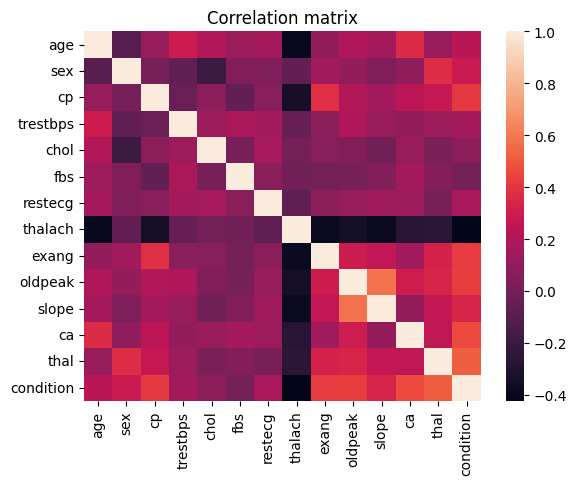

In [4]:
corr_data = data.corr()

fig = plt.figure()
plt.title("Correlation matrix")

sns.heatmap(corr_data);

 How many features are highly correlated?

In [5]:
corr_data[(corr_data < 1) & (corr_data > 0.8)].sum().sum()

0.0

There are no highly correlated featutures so we can use LogisticRegression as a baseline model.

## Lets have a look at continous features' distribution.

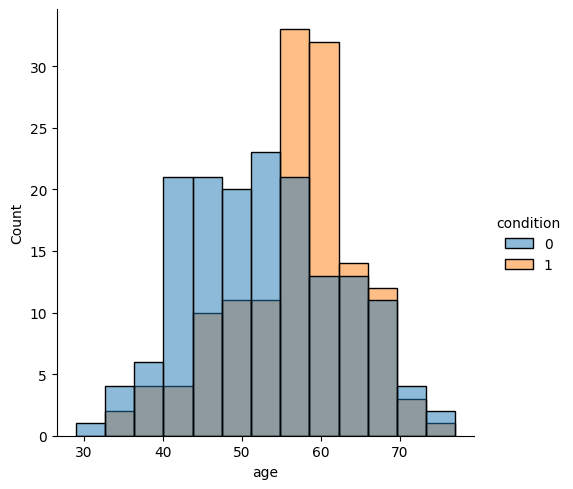

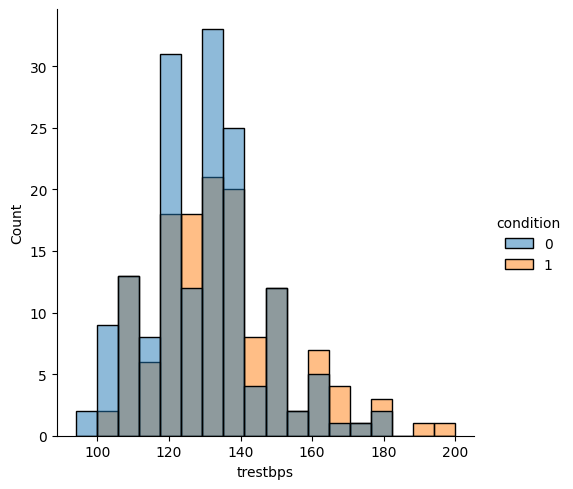

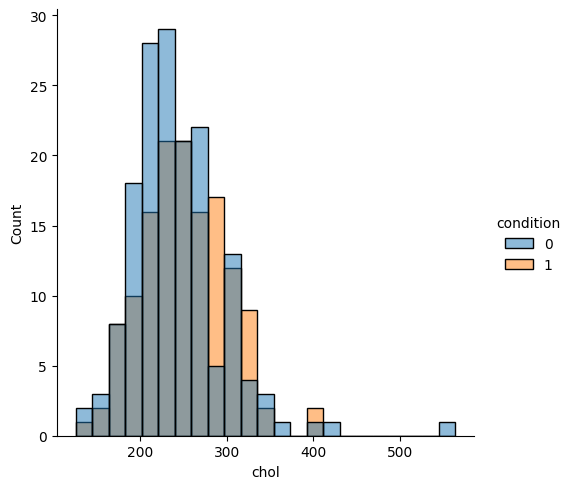

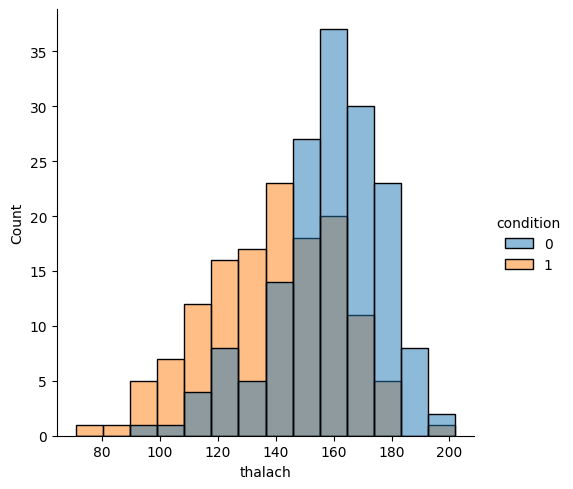

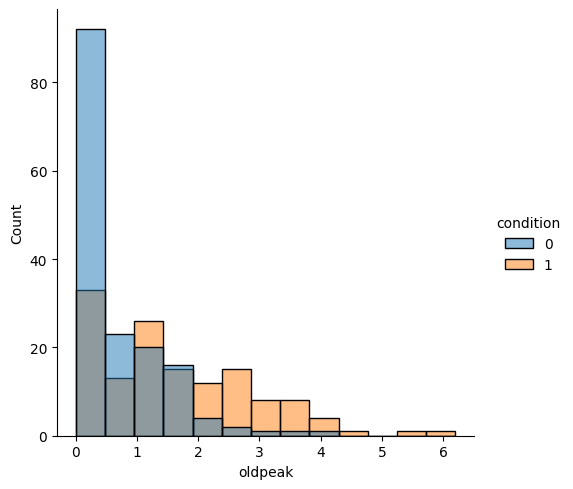

In [6]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
discrete_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for feature in continuous_features:
    sns.displot(data, x=feature, hue='condition')

Seems there are almost no outliers.

The only significant outlier is the one outlier with chol > 500 (too much above the norm).

The data should be normalized as well. 

Check if target classes are balanced.

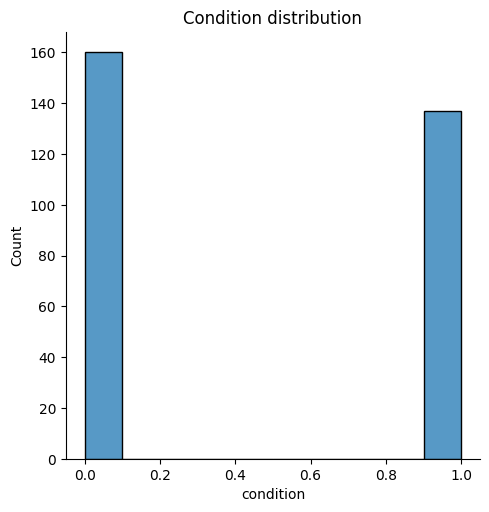

In [7]:
sns.displot(data, x='condition', label='displot')
plt.title('Condition distribution');

The classes are balanced so we should not worry about it.

## Preprocessing

In [8]:
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.model_selection import train_test_split

data = data[data['chol'] < 500]

normalizer = Normalizer()
normed_data = data.copy()
normed_data.loc[:, continuous_features] = normalizer.fit_transform(data.loc[:, continuous_features])

Encode the data

In [9]:
X = normed_data.drop(['condition'], axis=1)
y = normed_data['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# # write test to data
# test = pd.DataFrame(X_test)
# test['condition'] = y_test
# test.to_csv('../data/test.csv', index=False)

# # write train to data
# train = pd.DataFrame(X_train)
# train['condition'] = y_train
# train.to_csv('../data/train.csv', index=False)

Splited the data for train and test

## Model training

In [10]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

In [11]:
parameter_grid = [
    {'penalty': ['l2', 'l1'], 'C': np.arange(0.1, 1, 0.01)},
    {'penalty': ['elasticnet'], 'l1_ratio': np.arange(0, 1, 0.01)}
]

model = LogisticRegression(solver='saga', max_iter=1000)
grid_model = GridSearchCV(model, parameter_grid)
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid=[{'C': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0...
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                          'penalty': ['elasticnet']}])

In [12]:
pd.DataFrame(grid_model.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001759,0.000279,0.000480,0.000081,0.1,l2,NaN,"{'C': 0.1, 'penalty': 'l2'}",0.928571,0.857143,0.780488,0.853659,0.780488,0.84007,0.055513,1
2,0.001582,0.000085,0.000422,0.000053,0.11,l2,NaN,"{'C': 0.11, 'penalty': 'l2'}",0.928571,0.857143,0.780488,0.853659,0.780488,0.84007,0.055513,1
4,0.001666,0.000061,0.000405,0.000005,0.12,l2,NaN,"{'C': 0.12, 'penalty': 'l2'}",0.928571,0.857143,0.780488,0.853659,0.780488,0.84007,0.055513,1
6,0.001682,0.000044,0.000407,0.000023,0.13,l2,NaN,"{'C': 0.13, 'penalty': 'l2'}",0.928571,0.857143,0.780488,0.853659,0.780488,0.84007,0.055513,1
8,0.001638,0.000031,0.000381,0.000011,0.14,l2,NaN,"{'C': 0.13999999999999999, 'penalty': 'l2'}",0.928571,0.857143,0.780488,0.853659,0.780488,0.84007,0.055513,1


In [13]:
grid_model.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, solver='saga')

In [14]:
grid_model.best_params_

{'C': 0.1, 'penalty': 'l2'}

## Check metrics of the best estimator

In [15]:
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

model = grid_model.best_estimator_

prediction_proba = model.predict_proba(X_test)[:, 1]
prediction = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, prediction)
f1_scr = f1_score(y_test, prediction)

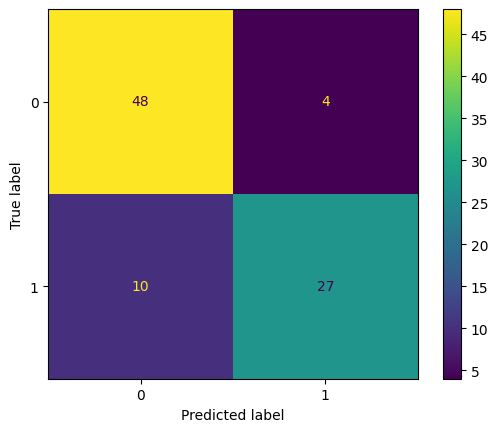

In [16]:
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
disp.plot();

In [17]:
roc_auc = roc_auc_score(y_test, prediction_proba) 
print(f'{roc_auc=}\n{f1_scr=}')

roc_auc=0.8861746361746362
f1_scr=0.7941176470588235


The results are fine. We will proceed with this model.